##Importing Data

In [ ]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
import pandas as pd
import io

# auth.authenticate_user()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/churn.csv')

##EDA

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Get the size of the dataset
df.shape

(10000, 14)

In [ ]:
# Get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Get summary statistics of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Count unique values in each column
for col in df.columns:
  print(col, df[col].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [ ]:
# Isolate the categorical variables
categorical_variables = [col for col in df.columns if df[col].nunique() <= 11 and col not in "Exited"]
categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [ ]:
# Isolate the numerical variables
numerical_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() > 11
                        and col not in "CustomerId"
                        and col not in "RowNumber"]
numerical_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# Get the count of values of the dependent variable
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Churn in the dataset (Exited = 1) only makes ~20% of the dataset.
This is a clear imbalanced data that can affect the performance of the prediction model.

In [ ]:
# Customers who left the bank
churn = df.loc[df["Exited"]==1]

# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

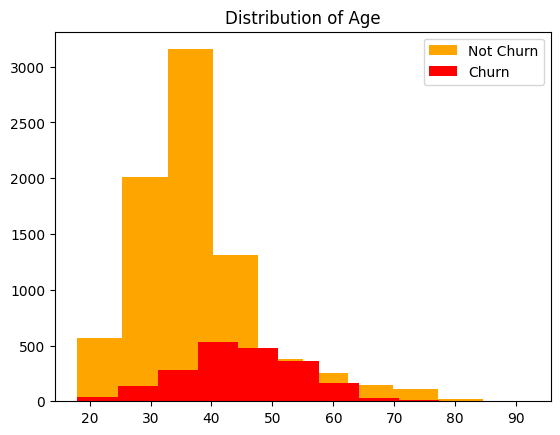

In [ ]:
# Check Age distribution
import matplotlib.pyplot as plt

plt.hist(not_churn["Age"], label="Not Churn", color='orange')
plt.hist(churn["Age"], label="Churn", color='red')
plt.title("Distribution of Age")
plt.legend()
plt.show()

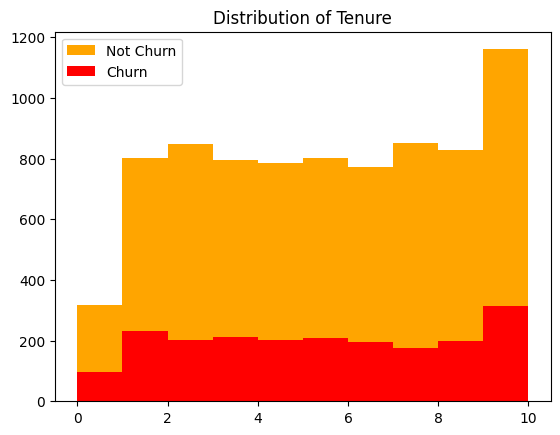

In [ ]:
# Check Tenure distribution
plt.hist(not_churn["Tenure"], label="Not Churn", color='orange')
plt.hist(churn["Tenure"], label="Churn", color='red')
plt.title("Distribution of Tenure")
plt.legend()
plt.show()

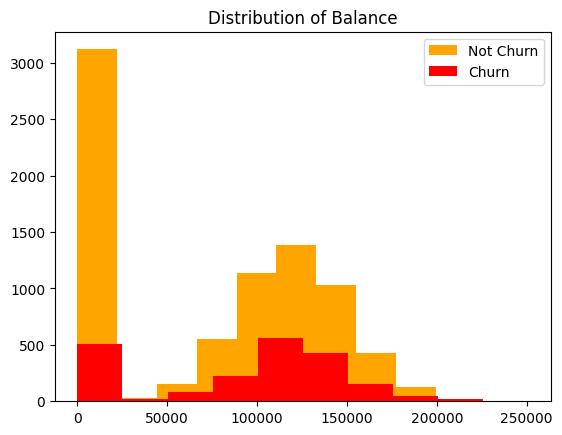

In [ ]:
# Check Balance distribution
plt.hist(not_churn["Balance"], label="Not Churn", color='orange')
plt.hist(churn["Balance"], label="Churn", color='red')
plt.title("Distribution of Balance")
plt.legend()
plt.show()

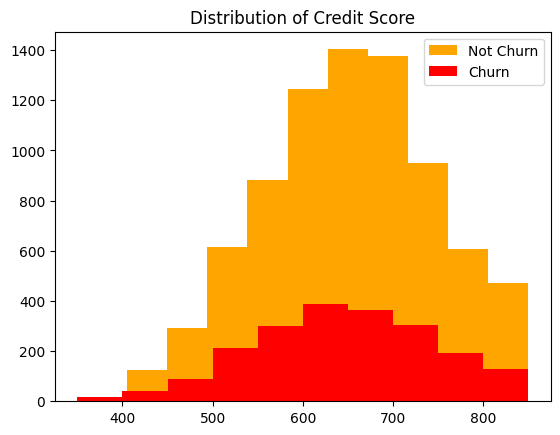

In [ ]:
# Check CreditScore distribution
plt.hist(not_churn["CreditScore"], label="Not Churn", color='orange')
plt.hist(churn["CreditScore"], label="Churn", color='red')
plt.title("Distribution of Credit Score")
plt.legend()
plt.show()

##Data Preprocessing

In [ ]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset is free of null values.

<Axes: >

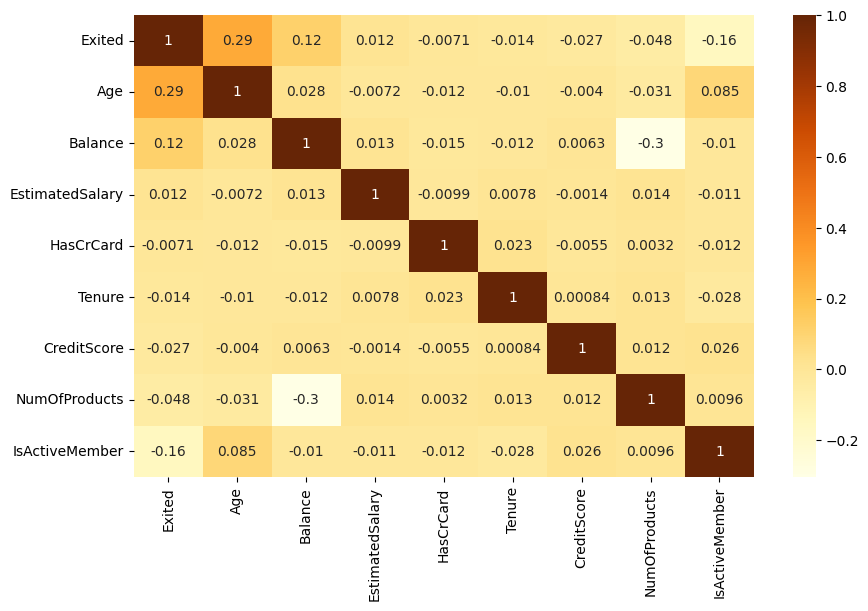

In [ ]:
# Correlation Matrix
import seaborn as sns

k = 10 # number of variables for heatmap
df_corr = df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'], axis=1)
cols = df_corr.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'YlOrBr')

From the heatmap, we can see that no two numerical variables are highly correlated.
Hence we do not need to drop any numerical variables.

In [ ]:
# Drop columns that do not affect the dependent variable
df_prepared = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Feature Engineering

In [ ]:
# Encode categorical variables which type are string
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

## Encode Gender
label_encoder.fit(df_prepared['Gender'])
df_prepared['Gender'] = label_encoder.transform(df_prepared['Gender'])

## Encode Geography
label_encoder.fit(df_prepared['Geography'])
df_prepared['Geography'] = label_encoder.transform(df_prepared['Geography'])

df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Scale numerical variables using RobustScaler since it handles outliers better
from sklearn.preprocessing import RobustScaler

mmscaler = RobustScaler()
df_prepared[numerical_variables] = mmscaler.fit_transform(df_prepared[numerical_variables])
df_prepared.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.246269,0,0,0.416667,2,-0.761480,1,1,1,0.011739,1
1,-0.328358,2,0,0.333333,1,-0.104906,1,0,1,0.125512,0
2,-1.119403,0,0,0.416667,8,0.489346,3,1,0,0.139630,1
3,0.350746,0,0,0.166667,1,-0.761480,2,0,0,-0.064717,0
4,1.477612,2,0,0.500000,2,0.221806,1,1,1,-0.214561,0


##Modeling

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df_prepared.drop("Exited", axis=1)
y = df_prepared["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##Logistic Regression

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  73
True Negative :  1562
False Positive:  328
False Negative:  37


In [ ]:
# Evaluating the model with performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (logreg_accuracy * 100.0))
print("Precision: %.2f%%" % (logreg_precision * 100.0))
print("Recall: %.2f%%" % (logreg_recall * 100.0))
print("F1 Score: %.2f%%" % (logreg_f1 * 100.0))

Accuracy: 81.75%
Precision: 66.36%
Recall: 18.20%
F1 Score: 28.57%


##Decision Tree

In [ ]:
# Train the model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  200
True Negative :  1373
False Positive:  201
False Negative:  226


In [ ]:
# Evaluating the model with performance metrics

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))
print("Precision: %.2f%%" % (dt_precision * 100.0))
print("Recall: %.2f%%" % (dt_recall * 100.0))
print("F1 Score: %.2f%%" % (dt_f1 * 100.0))

Accuracy: 78.65%
Precision: 46.95%
Recall: 49.88%
F1 Score: 48.37%


##Random Forest

In [ ]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  189
True Negative :  1546
False Positive:  212
False Negative:  53


In [ ]:
# Evaluating the model with performance metrics

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print("Precision: %.2f%%" % (rf_precision * 100.0))
print("Recall: %.2f%%" % (rf_recall * 100.0))
print("F1 Score: %.2f%%" % (rf_f1 * 100.0))

Accuracy: 86.75%
Precision: 78.10%
Recall: 47.13%
F1 Score: 58.79%


##XGBoost

In [ ]:
# Train the model

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Make a prediction
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  205
True Negative :  1524
False Positive:  196
False Negative:  75


In [ ]:
# Evaluating the model with performance metrics

xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (xg_accuracy * 100.0))
print("Precision: %.2f%%" % (xg_precision * 100.0))
print("Recall: %.2f%%" % (xg_recall * 100.0))
print("F1 Score: %.2f%%" % (xg_f1 * 100.0))

Accuracy: 86.45%
Precision: 73.21%
Recall: 51.12%
F1 Score: 60.21%


##Comparing Models

In [ ]:
compare = pd.DataFrame(
    [
        ['Logistic Regression', logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
        ['Decision Tree', dt_accuracy, dt_precision, dt_recall, dt_f1],
        ['Random Forest', rf_accuracy, rf_precision, rf_recall, rf_f1],
        ['XGBoost', xg_accuracy, xg_precision, xg_recall, xg_f1]
    ],
    columns = ['model', 'accuracy', 'precision', 'recall', 'f1_score']
)

compare.style.highlight_max(color="green")

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.817500,0.663636,0.182045,0.285714
1,Decision Tree,0.786500,0.469484,0.498753,0.483676
2,Random Forest,0.867500,0.780992,0.471322,0.587869
3,XGBoost,0.864500,0.732143,0.511222,0.602056


Random Forest is very effective overall, with the highest accuracy and precision, making it excellent for scenarios where a false positive has a high cost.

XGBoost excels in balancing recall and precision (as indicated by its F1 score), making it suitable for cases where both false negatives and false positives are costly.

Decision Tree has reasonable recall but lacks in other areas, suggesting it might be overfitting or not generalizing well beyond its training data.

Logistic Regression seems to be underperforming in this scenario, especially in terms of recall and F1 score, suggesting it might not be capturing the complexity of the dataset or the relationships between features effectively.

**Random Forest might be the overall best choice if you prioritize accuracy and precision, indicating it makes fewer mistakes in general and especially fewer false positive errors.**